In [206]:
import numpy as np
import pandas as pd
import seaborn as sn

In [306]:
import math
import matplotlib.pylab as plt

from datetime import datetime as dt

#adjust to each CCY
df = pd.read_csv('All MXN Data.csv')

In [307]:
df.describe()

,Daily Trend #,Previous Day DXY Trend,RR Divergence,Previous Day SPY Trend,Trend Start,USDMXNV1M Tick,USDMXNV1Y Tick,V1M Change,V1Y Change,SPX Change,...,MXEF CCY Tick,BBDXY Tick,USDMXN RSI,USDMXN MACD,USDMXN ROC 4,USDMXN ROC 10,MXEF Change,MXEF CCY Change,BBDXY Change,Target
count,685.000000,669.000000,669.000000,669.000000,685.000000,685.000000,685.000000,685.000000,685.000000,684.000000,...,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,685.000000
mean,4.719708,-0.007668,0.015119,0.054574,19.429002,10.266356,11.506923,0.052464,0.016015,-0.701740,...,1622.341173,1204.040165,49.941522,-0.000092,-0.003705,-0.006030,-0.098286,0.099759,-0.160135,0.522628
std,4.458415,0.608251,0.175080,1.878169,0.297923,1.360840,0.418780,0.628138,0.133540,16.398022,...,17.042245,7.004962,23.527459,0.002786,0.118807,0.147665,3.938754,2.585430,1.881247,0.499853
min,1.000000,-1.620000,-0.458000,-5.830000,18.864400,8.160000,10.540000,-1.943000,-0.587000,-62.890000,...,1588.090000,1184.780000,3.354869,-0.023492,-1.103181,-1.116204,-15.220000,-7.710000,-6.330000,0.000000
25%,2.000000,-0.450000,-0.087000,-1.300000,19.160300,9.200000,11.148000,-0.160000,-0.030000,-6.180000,...,1609.830000,1200.100000,28.380707,-0.001475,-0.066835,-0.099265,-2.300000,-1.470000,-1.090000,0.000000
50%,3.000000,0.030000,0.011000,0.260000,19.438800,9.725000,11.595000,-0.063000,-0.007000,0.000000,...,1621.570000,1205.120000,49.791526,-0.000056,-0.006810,-0.012426,0.010000,0.120000,0.010000,1.000000
75%,6.000000,0.450000,0.137200,1.370000,19.652100,11.613000,11.808000,0.040000,0.025000,6.547500,...,1634.940000,1208.940000,72.182231,0.001618,0.065290,0.101480,1.930000,1.450000,0.910000,1.000000
max,31.000000,1.310000,0.438000,5.180000,20.240700,13.473000,12.365000,3.360000,0.635000,59.300000,...,1655.030000,1221.080000,94.632747,0.007584,0.434740,0.436793,14.280000,8.830000,6.160000,1.000000


In [308]:
df['Trend Start Time'] = pd.to_datetime(df['Trend Start Time'])
df = df.sort_values(by='Trend Start Time',ascending=True)
df['Weekday'] = df['Trend Start Time'].dt.weekday_name
df['Hour'] = df['Trend Start Time'].dt.hour
df['Hour'] = df['Hour'].astype('category')
df['Weekday'] = df['Weekday'].astype('category')

df['Trend Type 2']  = np.where(df['Trend Type'] == 'Up', 1, 0)
df = df.drop('Trend Type', axis=1)
df = df.reset_index()

In [309]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [310]:
df['Trend Start Time'] = df['Trend Start Time'].dt.hour * 60 + df['Trend Start Time'].dt.minute

In [311]:
#df = df.drop(['Day Start'],axis = 1)
df = df.dropna()
# df = df.drop([''], axis=1)

In [312]:
df

,index,Trend Start Time,Daily Trend #,Previous Day DXY Trend,RR Divergence,Previous Day SPY Trend,Trend Start,USDMXNV1M Tick,USDMXNV1Y Tick,V1M Change,...,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19
20,20,631,1.0,0.68,-0.0265,-0.76,19.1317,9.798,11.200,-0.180,...,1,0,0,0,0,0,0,0,0,0
21,21,207,1.0,0.63,0.1782,1.01,19.0662,9.775,11.155,-0.033,...,0,0,0,0,0,0,0,0,0,0
22,22,372,2.0,0.63,0.1782,1.01,19.1174,9.728,11.150,-0.080,...,0,0,0,0,0,0,0,0,0,0
23,23,557,3.0,0.63,0.1782,1.01,19.0703,9.247,11.035,-0.561,...,0,0,0,0,0,0,0,0,0,0
24,24,597,4.0,0.63,0.1782,1.01,19.1212,9.245,11.033,-0.563,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,680,502,1.0,0.54,-0.1073,0.37,19.4453,8.265,10.560,-0.160,...,0,0,0,0,0,0,0,0,0,0
681,681,545,2.0,0.54,-0.1073,0.37,19.4894,8.320,10.560,-0.105,...,0,0,0,0,0,0,0,0,0,0
682,682,615,3.0,0.54,-0.1073,0.37,19.4432,8.318,10.543,-0.107,...,1,0,0,0,0,0,0,0,0,0
683,683,708,4.0,0.54,-0.1073,0.37,19.5443,8.315,10.543,-0.110,...,0,1,0,0,0,0,0,0,0,0


In [313]:
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plot

def plot_roc_curve(labels, prediction_probabilities, classifier_names):
    '''
        labels                   : DataFrames with one column containing the target variables for the test data
        prediction_probabilities : list of DataFrames with one column containing the predicted probabilities of class 1 
                                   for test data
        classifier_names         : list of names of classifiers used.
    '''
    
    plot.figure(figsize=(10, 10))
    
    for i in range(len(classifier_names)):
        fpr, tpr, thresholds = metrics.roc_curve(labels, prediction_probabilities[i])
        roc_auc = metrics.auc(fpr, tpr)
        plot.plot(fpr, tpr, label = classifier_names[i]+"(AUC="+str(round(metrics.auc(fpr, tpr), 3))+")")
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plot.xlim([0.0, 1.0])
    plot.ylim([0.0, 1.0])
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.title('Receiver operating characteristic')
    plot.legend(loc=0)
    plot.show()

In [314]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets:

X_train = df.drop('Target', axis=1)
X_train = X_train[:457]
X_test = df.drop('Target', axis=1)
X_test = X_test[457:]
y_train = df['Target']
y_train = y_train[:457]
y_test = df['Target']
y_test = y_test[457:]

X_train = X_train[['Trend Start Time', 'RR Divergence', 'Trend Start', 'USDMXNV1M Tick', 'V1M Change', 'V1Y Change', 'SPX Change', 'MXEF Tick', 'MXEF CCY Tick', 'BBDXY Tick', 'USDMXN RSI', 'USDMXN MACD', 'USDMXN ROC 4', 'USDMXN ROC 10', 'MXEF Change', 'MXEF CCY Change', 'BBDXY Change']]
X_test = X_test[['Trend Start Time', 'RR Divergence', 'Trend Start', 'USDMXNV1M Tick', 'V1M Change', 'V1Y Change', 'SPX Change', 'MXEF Tick', 'MXEF CCY Tick', 'BBDXY Tick', 'USDMXN RSI', 'USDMXN MACD', 'USDMXN ROC 4', 'USDMXN ROC 10', 'MXEF Change', 'MXEF CCY Change', 'BBDXY Change']]

# X_train = X_train[['USDMXN ROC 4', 'USDMXN MACD', 'MXEF Tick', 'Trend Start Time', 'BBDXY Change', 'Previous Day DXY Trend', 'Previous Day SPY Trend', 'V1M Change']]
# X_test = X_test[['USDMXN ROC 4', 'USDMXN MACD', 'MXEF Tick', 'Trend Start Time', 'BBDXY Change', 'Previous Day DXY Trend', 'Previous Day SPY Trend', 'V1M Change']]

# X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.33, random_state=42)

In [351]:
prediction_probabilities = []
classifier_names = []

In [328]:
# Scale data
from sklearn import preprocessing
x = df.drop('Target', axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

/usr/local/anaconda3/envs/IntroToDS/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


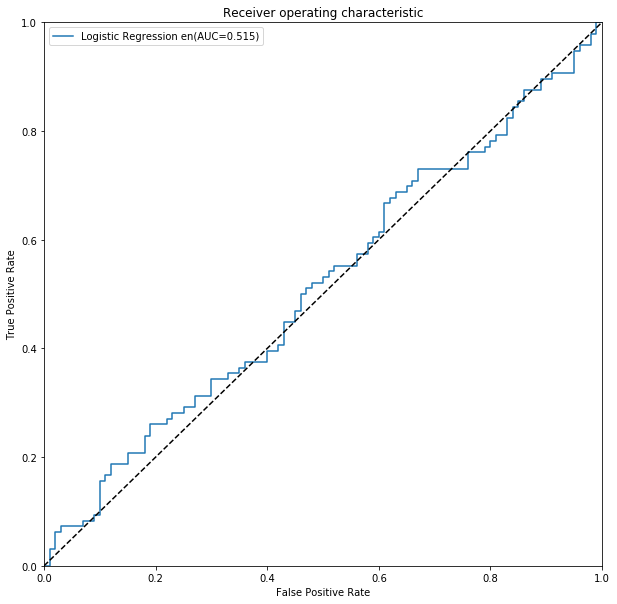

In [341]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
prediction_probabilities.append(logreg.predict_proba(X_test)[:,1])
classifier_names.append('Logistic Regression en')

plot_roc_curve(y_test, prediction_probabilities, classifier_names)

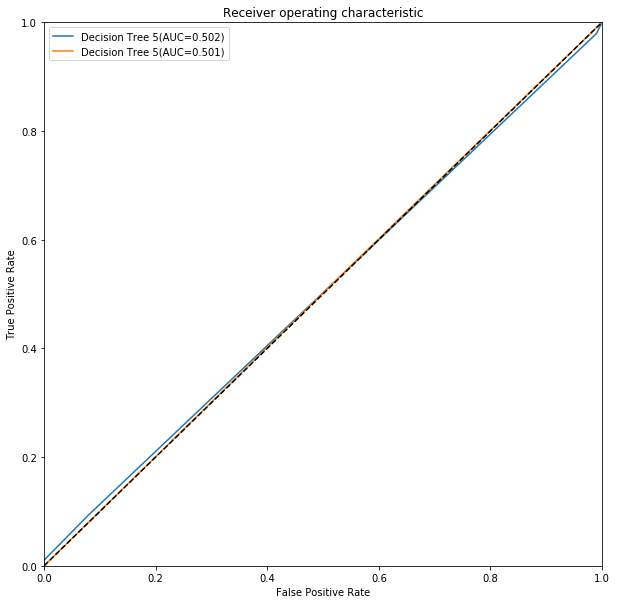

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
191,0.0,1.0
192,0.0,1.0
193,1.0,0.0
194,0.0,1.0


In [353]:
from sklearn.tree import DecisionTreeClassifier
# Decision Trees

clf = DecisionTreeClassifier(random_state=0, criterion = 'gini')
clf = clf.fit(X_train, y_train)

prediction_probabilities.append(clf.predict_proba(X_test)[:,1])
classifier_names.append('Decision Tree 5')

plot_roc_curve(y_test, prediction_probabilities, classifier_names)
pd.DataFrame(clf.predict_proba(X_test))


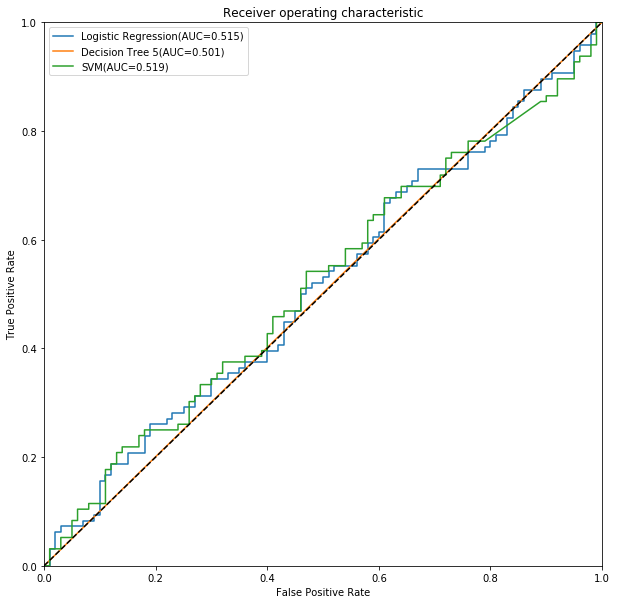

In [319]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', probability=True).fit(X_train_scaled, y_train)

prediction_probabilities.append(svm.predict_proba(X_test_scaled)[:,1])
classifier_names.append('SVM')

plot_roc_curve(y_test, prediction_probabilities, classifier_names)

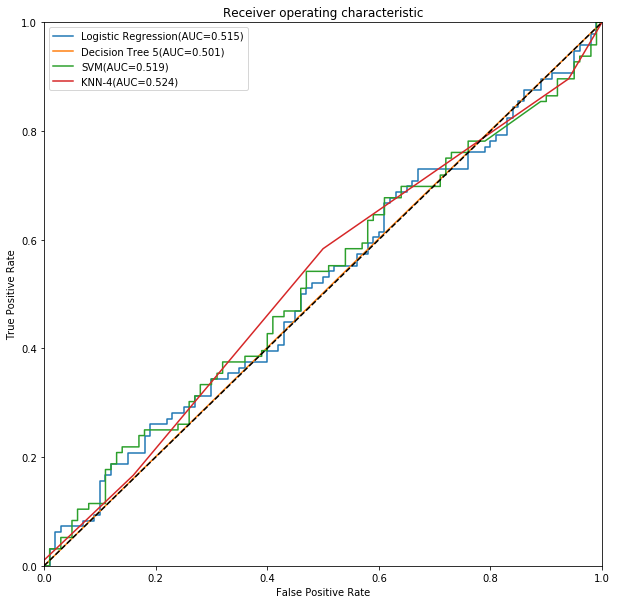

In [320]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_scaled, y_train)

prediction_probabilities.append(knn.predict_proba(X_test_scaled)[:,1])
classifier_names.append('KNN-4')

plot_roc_curve(y_test, prediction_probabilities, classifier_names)

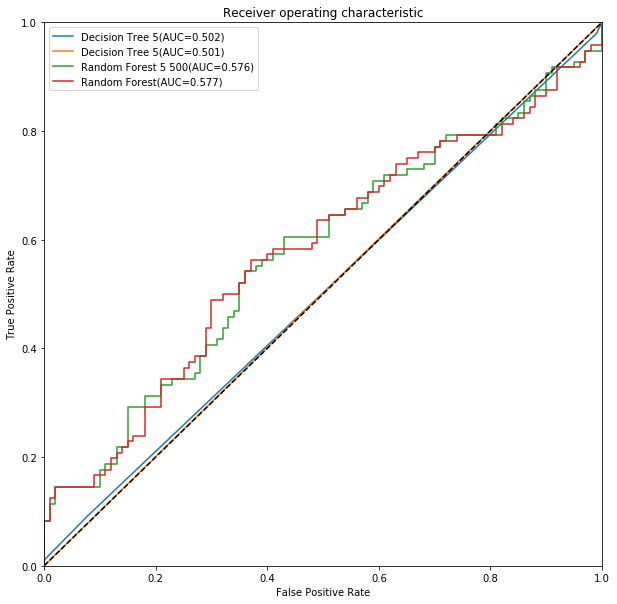

In [355]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2000, max_depth=5, random_state=0, criterion ='gini')
clf.fit(X_train, y_train)

prediction_probabilities.append(clf.predict_proba(X_test)[:,1])
classifier_names.append('Random Forest')

plot_roc_curve(y_test, prediction_probabilities, classifier_names)

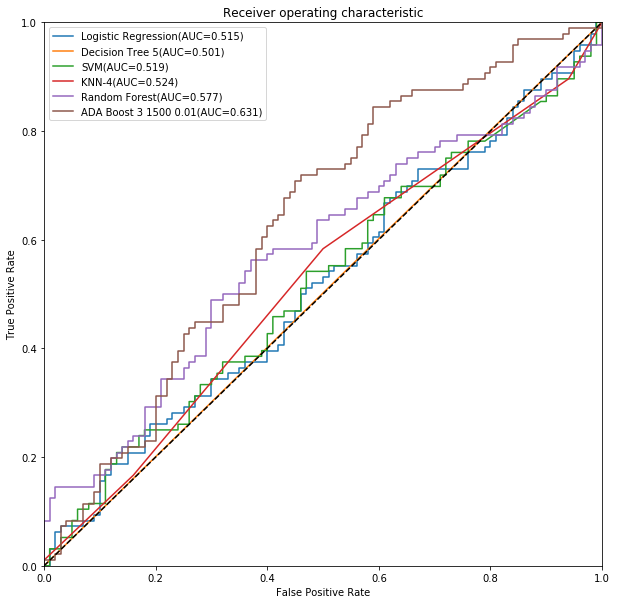

In [322]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, random_state=0, learning_rate=0.01)
clf.fit(X_train,y_train)

prediction_probabilities.append(clf.predict_proba(X_test)[:,1])
classifier_names.append('ADA Boost 3 1500 0.01')

plot_roc_curve(y_test, prediction_probabilities, classifier_names)

<BarContainer object of 17 artists>

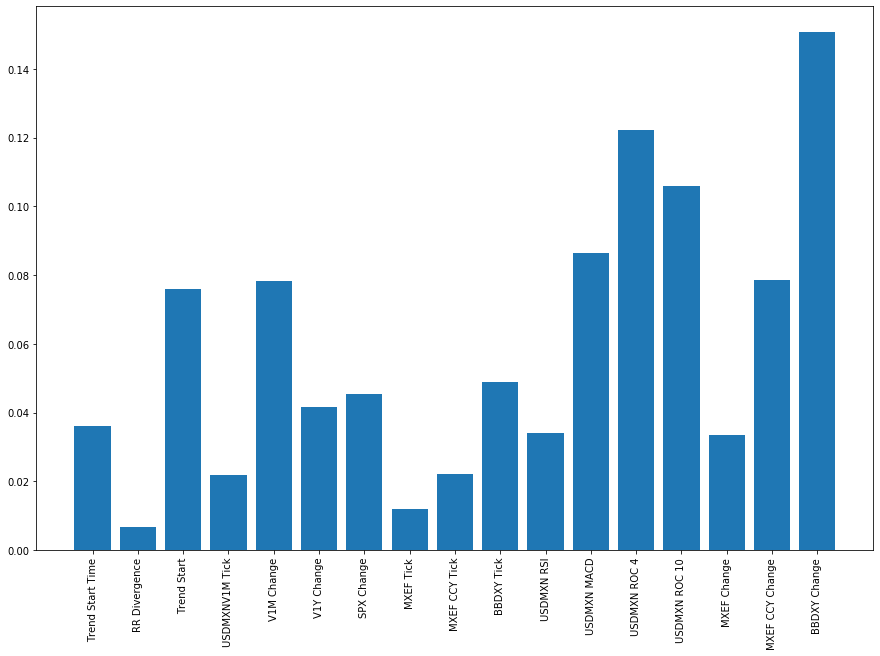

In [323]:

plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.bar(X_train.columns, clf.feature_importances_)

In [324]:
# X_train = X_train[['Trend Start Time', 'RR Divergence', 'Trend Start', 'USDMXNV1M Tick', 'V1M Change', 'V1Y Change', 'SPX Change', 'MXEF Tick', 'MXEF CCY Tick', 'BBDXY Tick', 'USDMXN RSI', 'USDMXN MACD', 'USDMXN ROC 4', 'USDMXN ROC 10', 'MXEF Change', 'MXEF CCY Change', 'BBDXY Change']]
prediction_probabilities = []
classifier_names = []

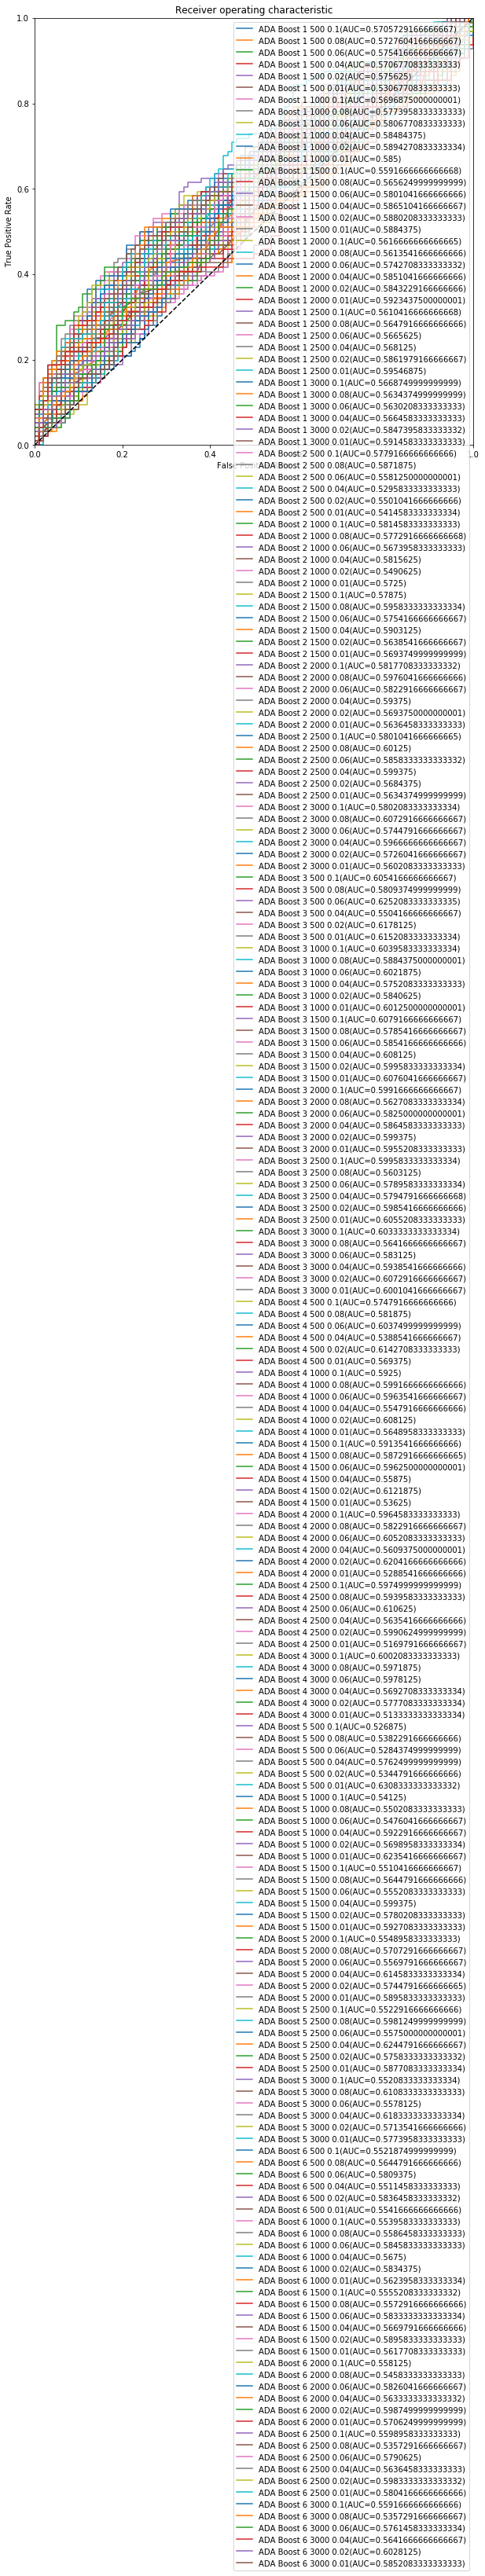

In [293]:
from sklearn.ensemble import AdaBoostClassifier

max_depths = [1,2,3,4,5,6]
estimators = [500, 1000, 1500, 2000, 2500, 3000]
learning_rates = [0.1, 0.08, 0.06, 0.04, 0.02, 0.01]

for depth in max_depths:
    for estimator in estimators:
        for rate in learning_rates:
            clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), n_estimators=estimator, random_state=0, learning_rate=rate)
            clf.fit(X_train,y_train)

            prediction_probabilities.append(clf.predict_proba(X_test)[:,1])
            classifier_names.append('ADA Boost ' + str(depth) + ' ' + str(estimator) + ' ' + str(rate))

plot_roc_curve(y_test, prediction_probabilities, classifier_names)

In [410]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, random_state=0, learning_rate=0.01)
clf.fit(X_train,y_train)

new_df = pd.DataFrame()

new_df['pred'] = clf.predict_proba(X_test)[:,0]
new_df['Actual'] = np.array(y_test)

new_df

,pred,Actual
0,0.906495,1
1,0.033684,1
2,0.230405,0
3,0.095432,1
4,0.957915,1
...,...,...
191,0.879640,0
192,0.149972,0
193,0.843533,1
194,0.358783,0


In [411]:
test_df = new_df.groupby(pd.cut(new_df["pred"], np.arange(0, 1.1, 0.1)))['Actual'].agg(["count", "sum"]).reset_index()
test_df.columns = ['pred', 'total predictions', 'count of 1s']
test_df['count of 0s'] = test_df['total predictions'] - test_df['count of 1s']
test_df['ratio'] = test_df['count of 0s']/test_df['total predictions']
test_df

,pred,total predictions,count of 1s,count of 0s,ratio
0,"(0.0, 0.1]",23,13,10,0.434783
1,"(0.1, 0.2]",20,10,10,0.500000
2,"(0.2, 0.3]",20,15,5,0.250000
3,"(0.3, 0.4]",20,10,10,0.500000
4,"(0.4, 0.5]",20,13,7,0.350000
5,"(0.5, 0.6]",25,11,14,0.560000
6,"(0.6, 0.7]",18,10,8,0.444444
7,"(0.7, 0.8]",23,6,17,0.739130
8,"(0.8, 0.9]",16,5,11,0.687500
9,"(0.9, 1.0]",11,3,8,0.727273


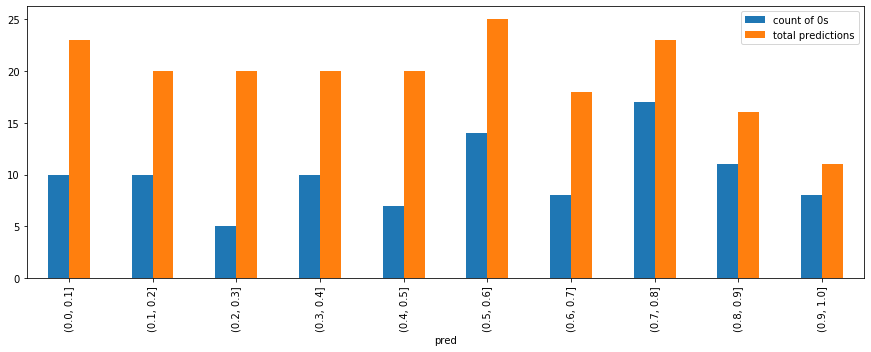

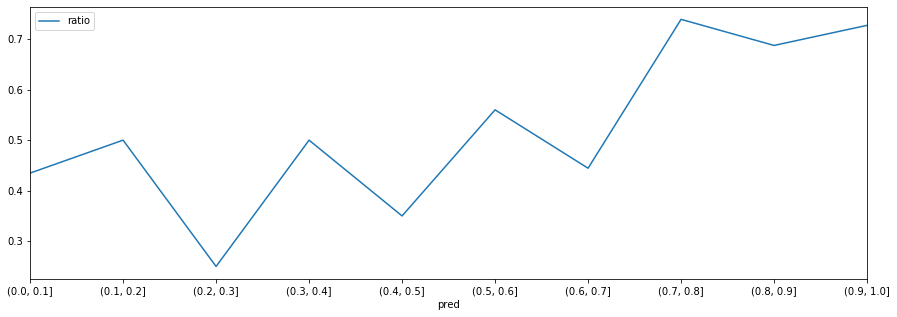

In [412]:
# new_df.plot(kind='bar',x='pred',y=['count', 'sum'])
# plt.show()

test_df.plot(x="pred", y=["count of 0s", "total predictions"], kind="bar", figsize=(15,5))
test_df.plot(x='pred', y='ratio', kind="line", figsize=(15,5))
plot.show()


TypeError: plot got an unexpected keyword argument 'x'

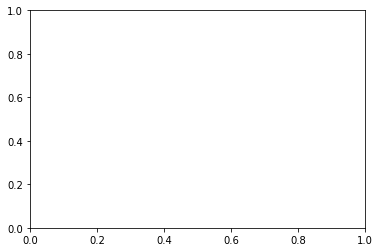